In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('kiva_loans.csv',parse_dates=(['posted_time','disbursed_time','funded_time']),dayfirst=False)

In [3]:
data1['borrower_genders'] = [e if e in ['male','female'] else 'group' for e in data1['borrower_genders']]

In [4]:
data1_male = data1[data1['borrower_genders'] == 'male']
data1_female = data1[data1['borrower_genders'] == 'female']
data1_group = data1[data1['borrower_genders'] == 'group']

In [5]:
group_m = data1_male.groupby(['country','sector'])
group_m = group_m.count()
group_m.sort_values('id',inplace=True)
group_m = group_m.pivot_table(values='id', index='country', columns='sector')
group_m['RESULT'] = group_m.sum(axis=1)
group_m.sort_values('RESULT',inplace=True, ascending=False)
group_m.drop('RESULT', axis='columns', inplace=True)
group_m = group_m.reindex(group_m.mean().sort_values(ascending=False).index, axis=1)
group_m_log = np.log(group_m)

In [6]:
group_f = data1_female.groupby(['country','sector'])
group_f = group_f.count()
group_f.sort_values('id',inplace=True)
group_f = group_f.pivot_table(values='id', index='country', columns='sector')
group_f['RESULT'] = group_f.sum(axis=1)
group_f.sort_values('RESULT',inplace=True, ascending=False)
group_f.drop('RESULT', axis='columns', inplace=True)
group_f = group_f.reindex(group_f.mean().sort_values(ascending=False).index, axis=1)
group_f_log = np.log(group_f)

In [7]:
group_g = data1_group.groupby(['country','sector'])
group_g = group_g.count()
group_g.sort_values('id',inplace=True)
group_g = group_g.pivot_table(values='id', index='country', columns='sector')
group_g['RESULT'] = group_g.sum(axis=1)
group_g.sort_values('RESULT',inplace=True, ascending=False)
group_g.drop('RESULT', axis='columns', inplace=True)
group_g = group_g.reindex(group_g.mean().sort_values(ascending=False).index, axis=1)
group_g_log = np.log(group_g)

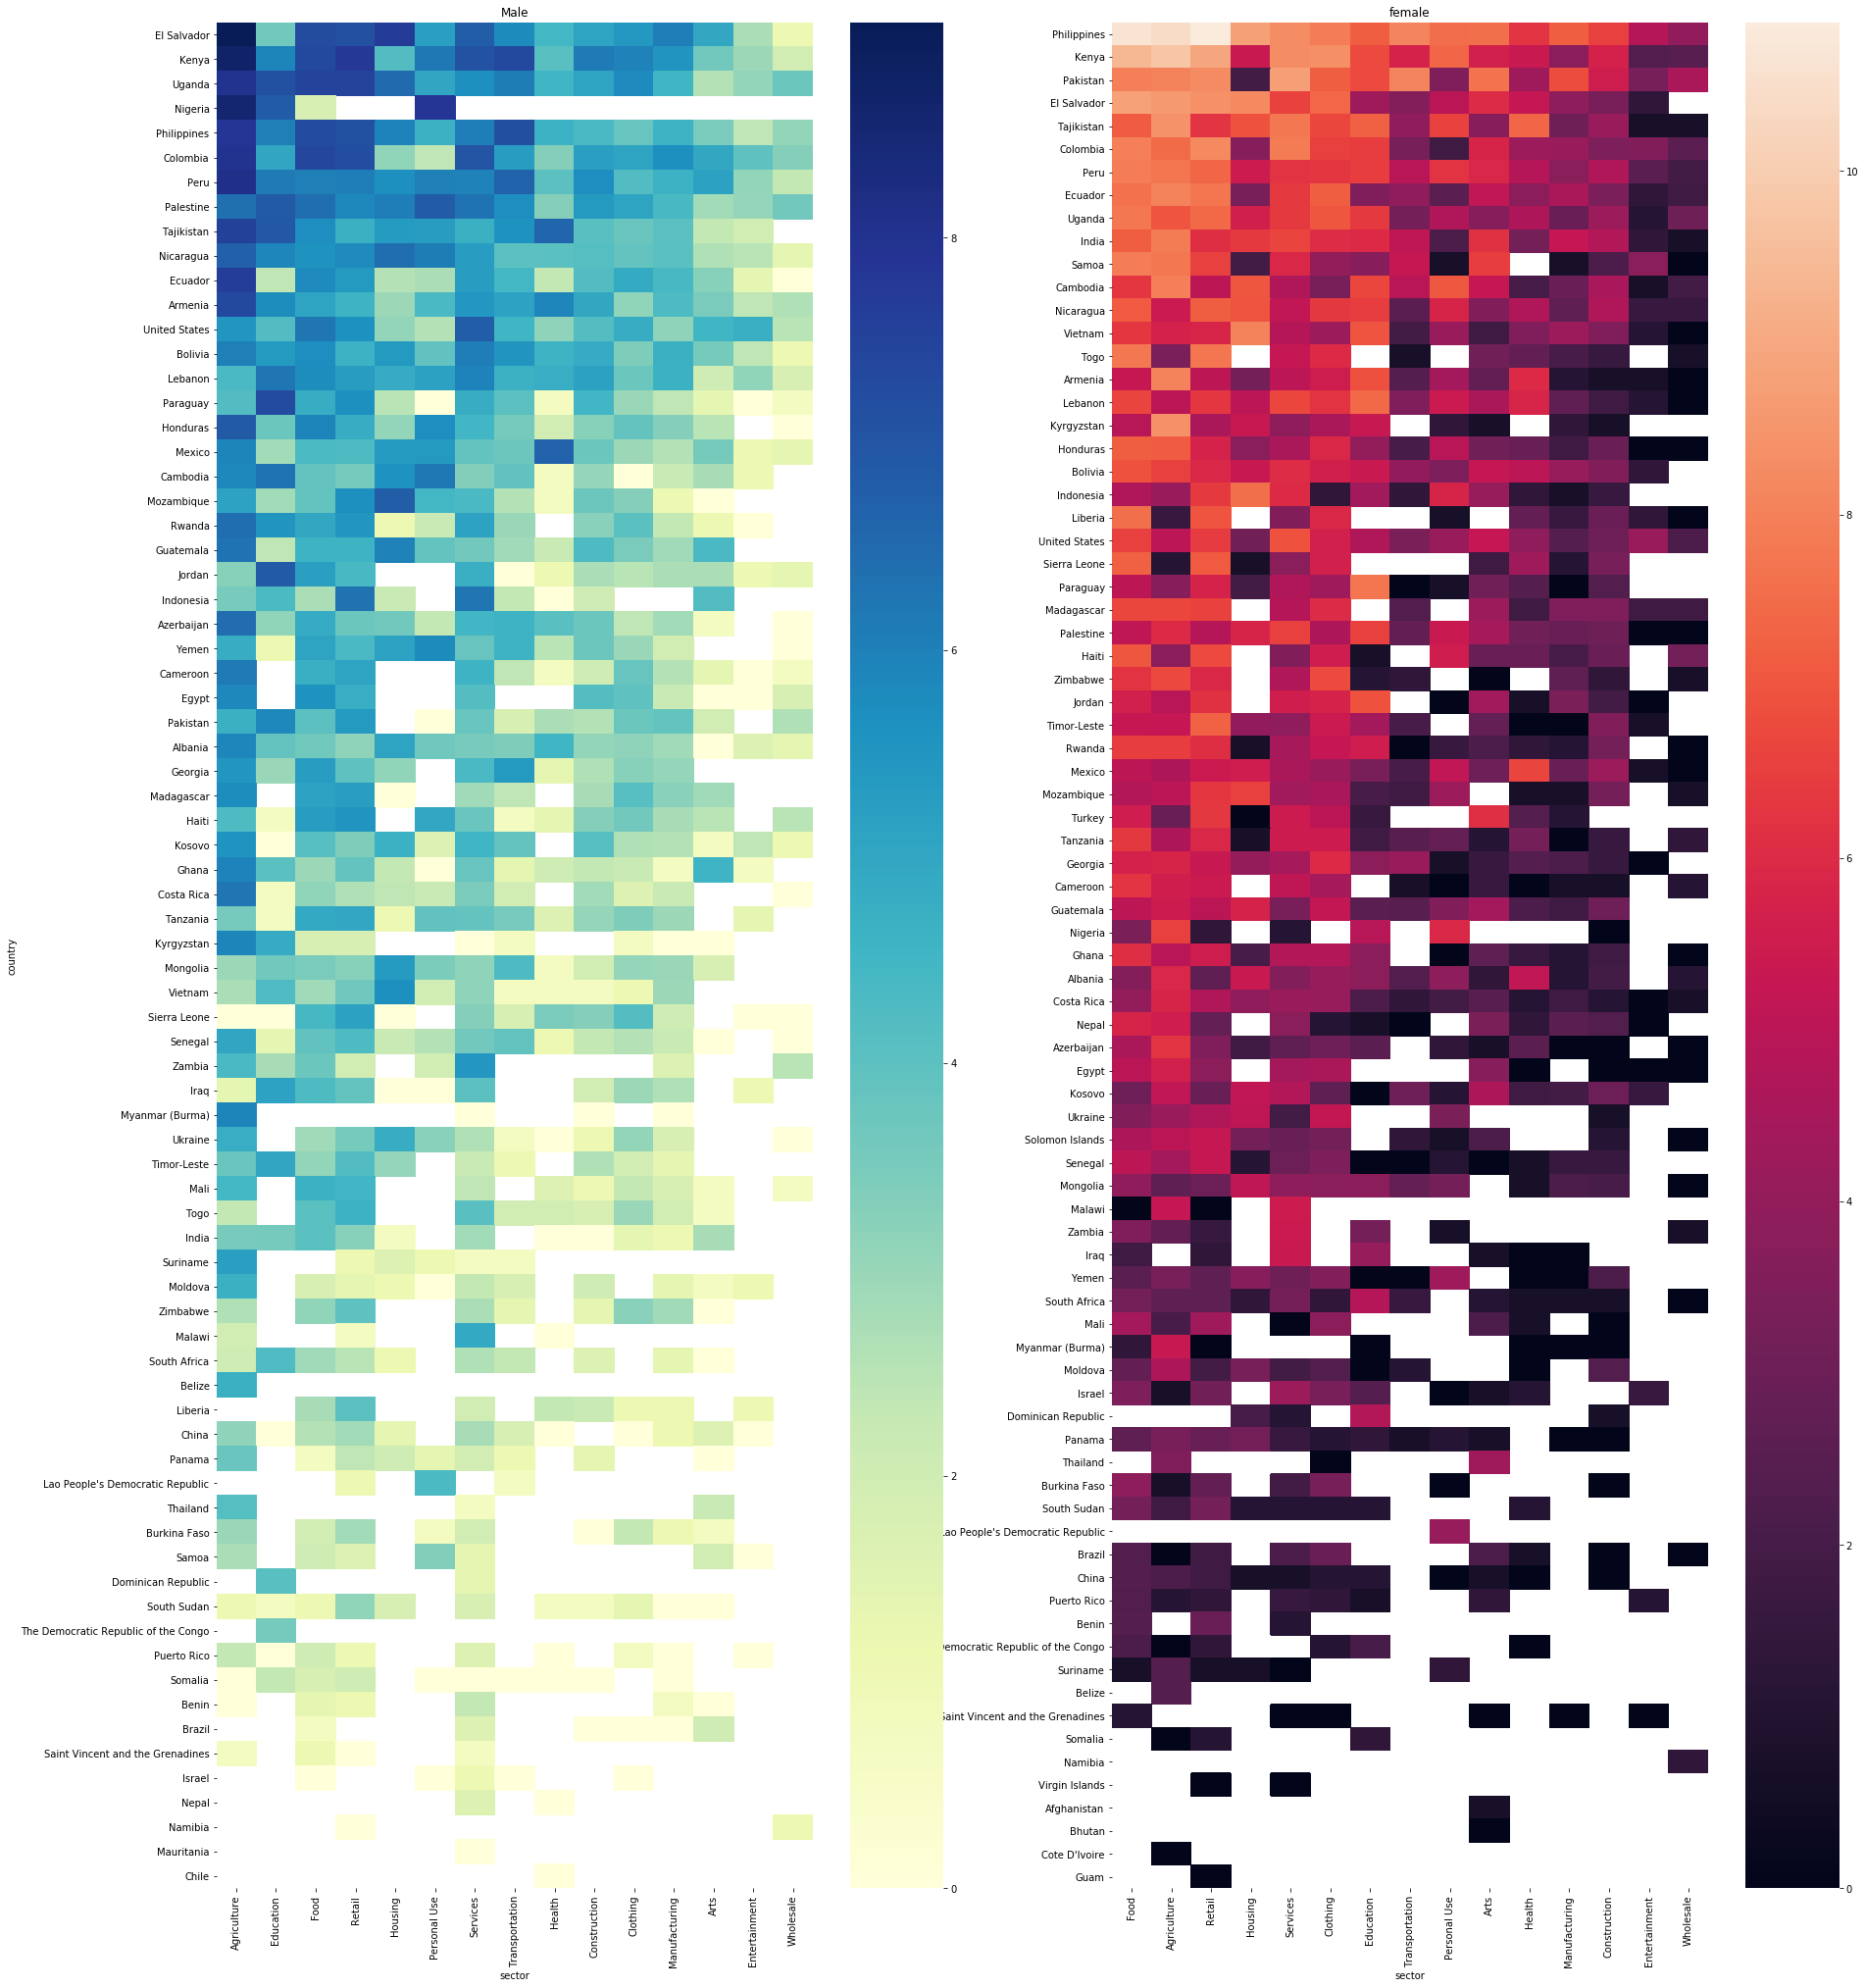

In [8]:
fig, ax = plt.subplots(1,2,figsize=(30,35))
ax[0].set_title('Male')
ax[1].set_title('female')
sns.heatmap(group_m_log,ax=ax[0],cmap="YlGnBu")
sns.heatmap(group_f_log,ax=ax[1])

In [9]:
# Наиболее распространённой сверой займа у женщин является сфера еды, у мужчин агрокультура

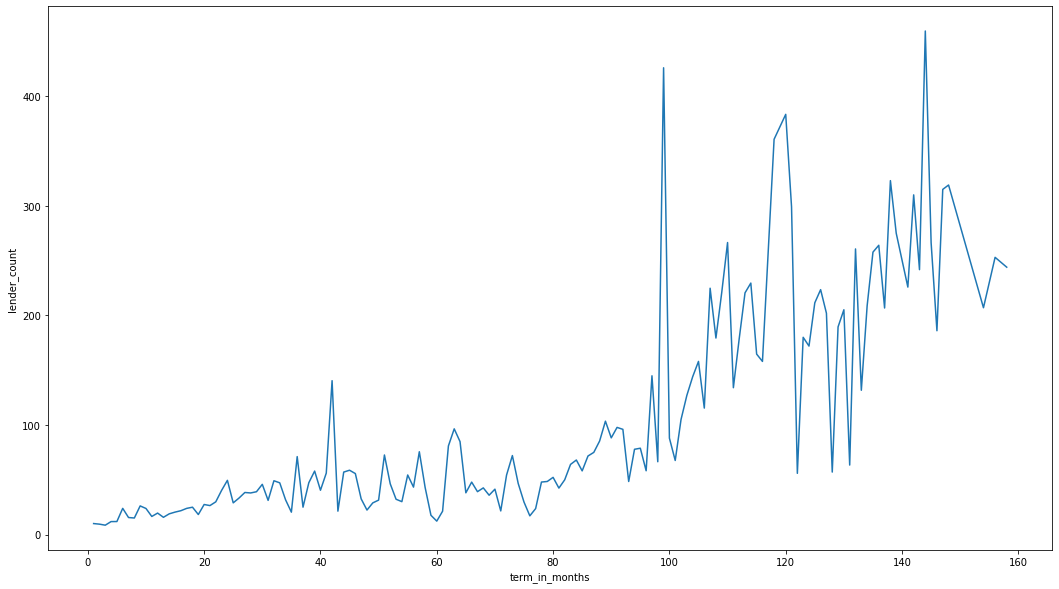

In [33]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ax.set_xlabel('term_in_months')
ax.set_ylabel('lender_count')
data1['one']=1
data_gr_mnt1 = data1.groupby('term_in_months')
#plt.scatter(data1['term_in_months'], data1['lender_count'], edgecolors='none', c='black', s=4)
plt.plot(data_gr_mnt1.sum().index, data_gr_mnt1.sum()['lender_count']/data_gr_mnt1.sum()['one'])

In [11]:
# В среднем малые группы обслуживаются быстрее

In [29]:
data2 = pd.read_csv('kiva_mpi_region_locations.csv') 
data2 = data2.dropna()
data3 = pd.merge(data1, data2, on=['country', 'region'])
data3['one']=1
data_gr_mnt = data3.groupby('term_in_months')

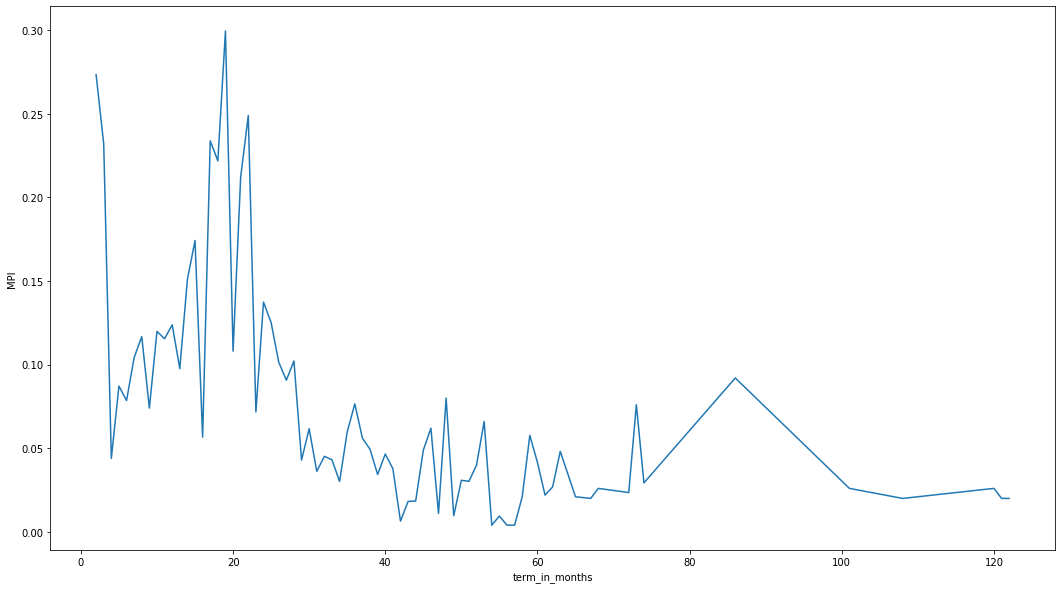

In [30]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ax.set_xlabel('term_in_months')
ax.set_ylabel('MPI')
plt.plot(data_gr_mnt.sum().index, data_gr_mnt.sum()['MPI']/data_gr_mnt.sum()['one'])


In [25]:
# Явная зависимость. ВЫсокий MPI обслуживается быстрее 

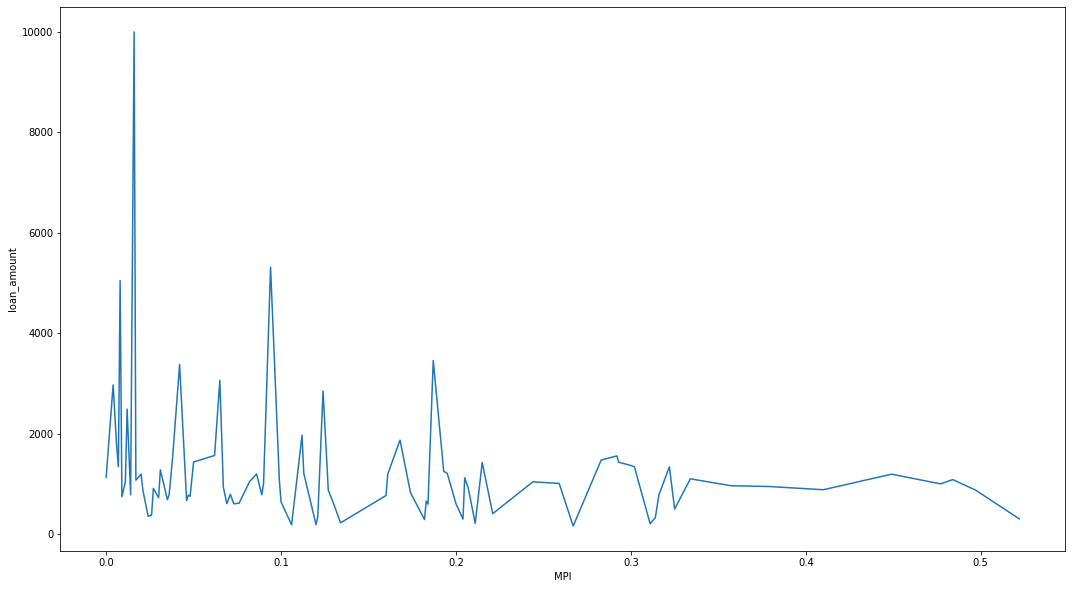

In [38]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ax.set_ylabel('loan_amount')
ax.set_xlabel('MPI')
data3['one']=1
data_gr_mnt2 = data3.groupby('MPI')
plt.plot(data_gr_mnt2.sum().index, data_gr_mnt2.sum()['loan_amount']/data_gr_mnt2.sum()['one'])

In [ ]:
# Страны с низким MPI в среднем занимают большие суммы

In [16]:
data3 = pd.merge(data1, data2, on=['country', 'region'])

In [17]:
data3['per_month'] = data3['funded_amount']/data3['term_in_months']

In [18]:
data3['fin_time'] = data3['funded_time'] - data3['posted_time']
data3['fin_time'] = data3['fin_time'].astype('timedelta64[s]')

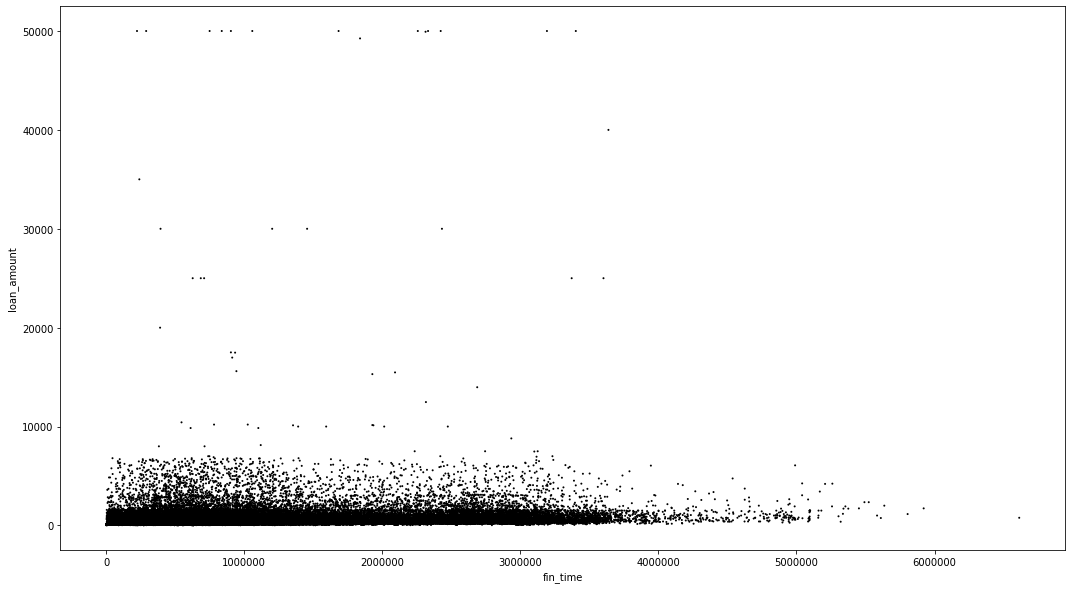

In [19]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ax.set_xlabel('fin_time')
ax.set_ylabel('loan_amount')
plt.scatter(data3['fin_time'], data3['loan_amount'], edgecolors='none', c='black', s=4)

In [20]:
# сумма займа практически не влияет на время финансирования

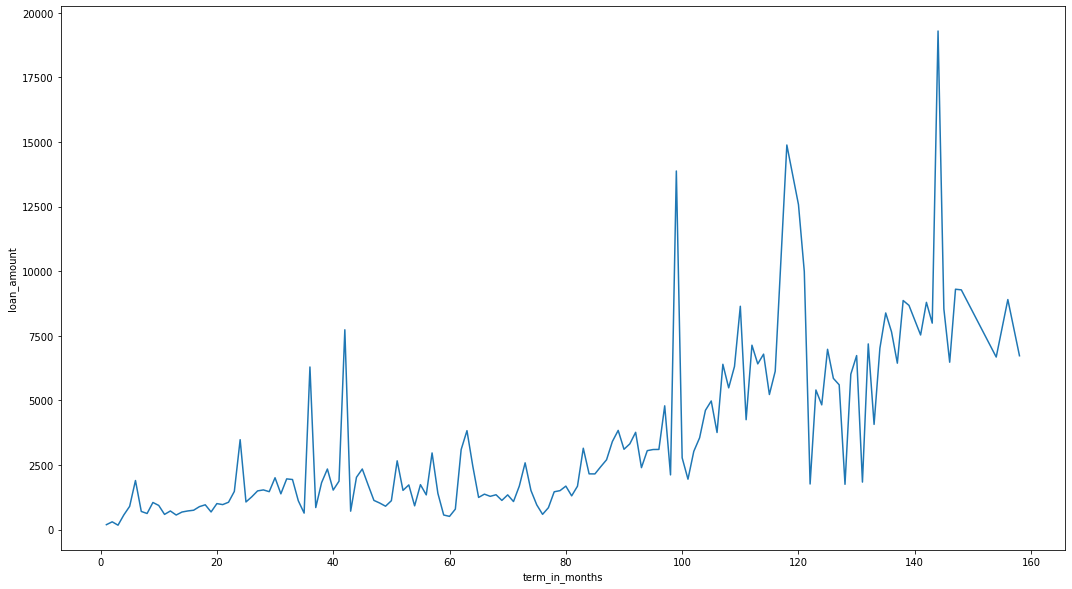

In [39]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ax.set_xlabel('term_in_months')
ax.set_ylabel('loan_amount')
data3['one']=1
data_gr_mnt4 = data3.groupby('term_in_months')
# plt.scatter(data3['term_in_months'], data3['loan_amount'], edgecolors='none', c='black', s=4)
plt.plot(data_gr_mnt1.sum().index, data_gr_mnt1.sum()['loan_amount']/data_gr_mnt1.sum()['one'])

In [22]:
# Большие суммы берутся на большие сроки